In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/archive/heart.csv')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

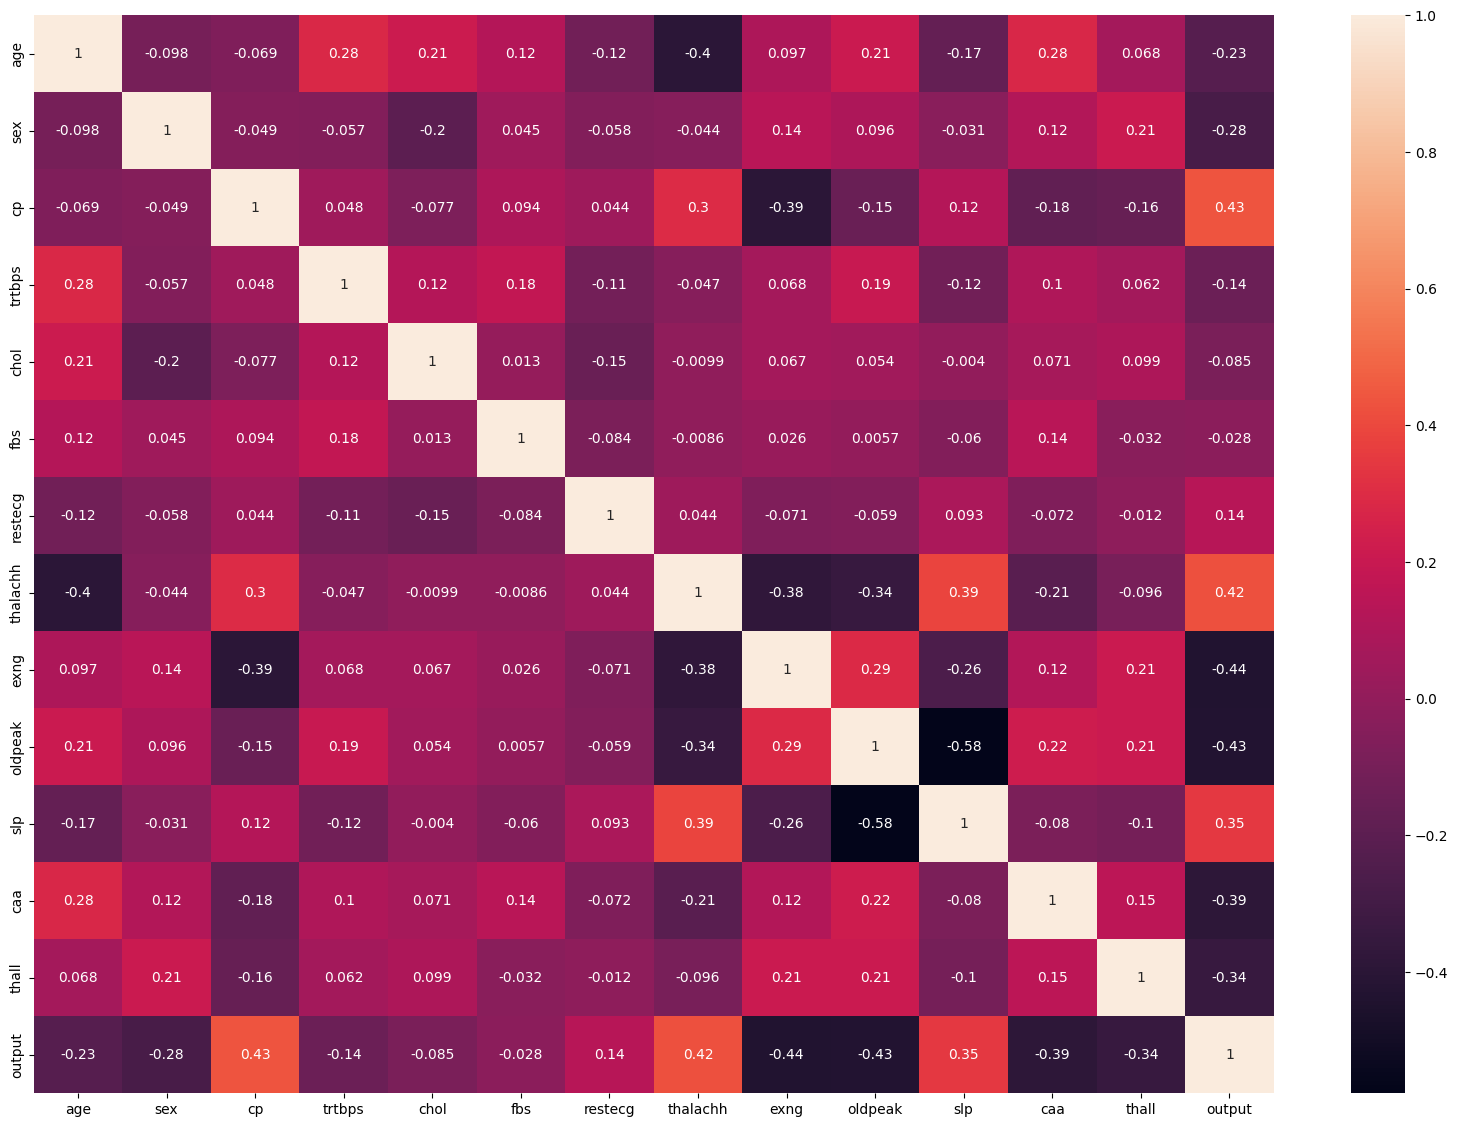

In [6]:
plt.figure(figsize=(20,14))
sns.color_palette('flare', as_cmap=True)
sns.heatmap(df.corr(), annot=True )

<Axes: xlabel='age', ylabel='chol'>

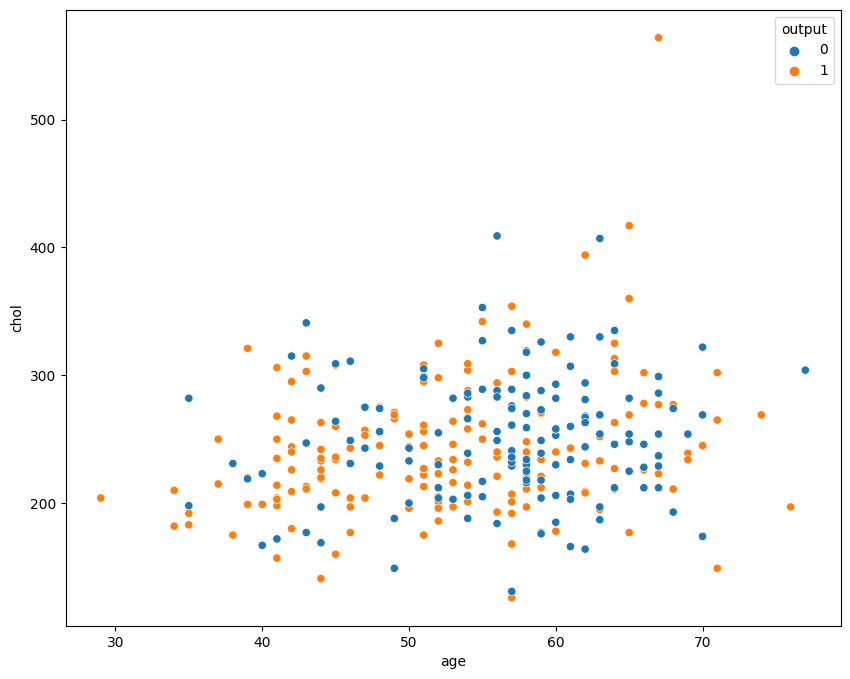

In [7]:
plt.figure(figsize=(10,8))
sns.color_palette('flare', as_cmap=True)
sns.scatterplot(data=df, x='age', y='chol', hue='output')

In [8]:
df.drop('fbs', axis=1, inplace=True)

In [9]:
df

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,1,115,1,1.2,1,1,3,0


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('output', axis=1)
y = df['output']

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X)

StandardScaler()

In [14]:
X_scaled = scaler.transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [16]:
X_train.shape

(242, 12)

In [17]:
X_test.shape

(61, 12)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
d_tree = DecisionTreeClassifier(random_state=100)

In [20]:
param_grid = {
}

In [21]:
grid_search = GridSearchCV(d_tree, param_grid, cv=10)

In [22]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={})

In [23]:
print(grid_search.best_params_)

{}


In [24]:
best_tree = grid_search.best_estimator_

In [25]:
y_pred = best_tree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
matrix = confusion_matrix(y_test, y_pred)

<Axes: >

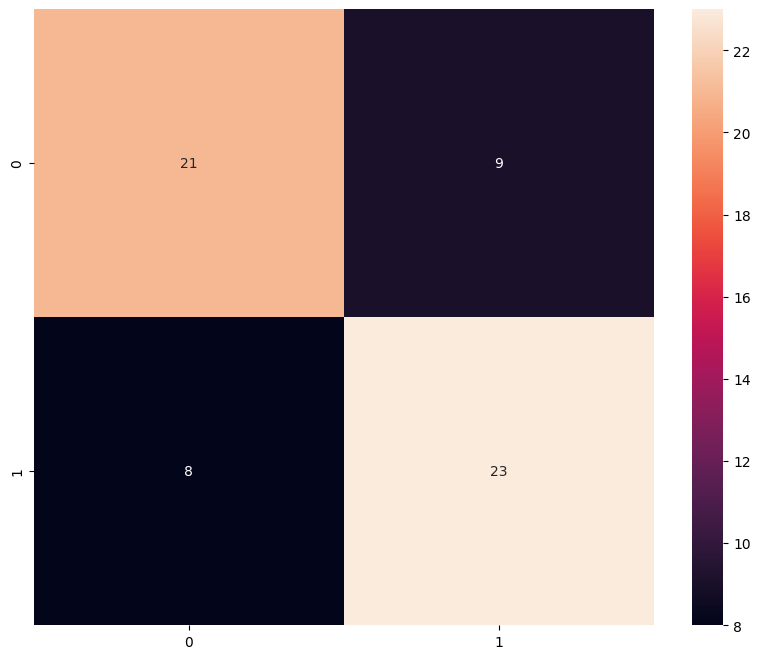

In [28]:
plt.figure(figsize=(10,8))
sns.color_palette('flare', as_cmap=True)
sns.heatmap(matrix, annot=True)

In [29]:
report = classification_report(y_test, y_pred)

In [30]:
print(report)

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.72      0.74      0.73        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [31]:
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [32]:
y_pred = d_tree.predict(X_test)

In [33]:
report_d_tree = classification_report(y_test, y_pred)

In [34]:
print(report_d_tree)

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.72      0.74      0.73        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(random_state=100)

In [37]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [38]:
y_pred = rfc.predict(X_test)

In [39]:
matrix = confusion_matrix(y_test, y_pred)

<Axes: >

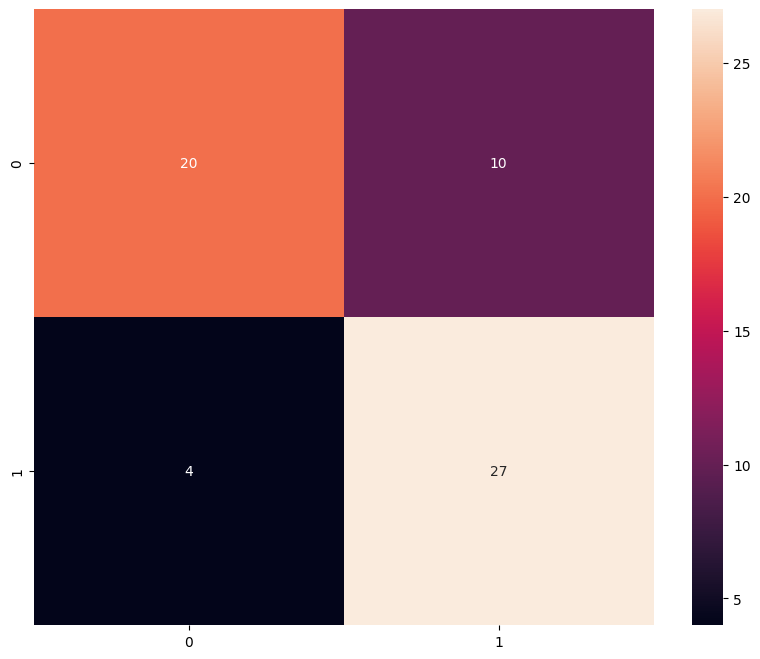

In [40]:
plt.figure(figsize=(10,8))
sns.color_palette('flare', as_cmap=True)
sns.heatmap(matrix, annot=True)

In [41]:
report_rfc = classification_report(y_test, y_pred)
print('/n')
print(report_d_tree)

/n
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.72      0.74      0.73        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [42]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'criterion': ['gini', 'log_loss'],  # Split criterion
    'max_depth': [10, 20, 30],  # Maximum depth of the tree
    'min_samples_leaf': [1, 2, 3]  # Minimum number of samples required to be at a leaf node
}

In [43]:
# rfc_cv = RandomForestClassifier()

In [44]:
# grid_search = GridSearchCV(rfc_cv, param_grid, cv=2)

In [45]:
# grid_search.fit(X_train, y_train)

In [46]:
# best_rfc = grid_search.best_estimator_

In [47]:
# grid_search.best_params_

In [48]:
# y_pred = best_rfc.predict(X_test)

In [49]:
# print(classification_report(y_test, y_pred))

In [51]:
print(report_rfc)
print(report_d_tree)

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.72      0.74      0.73        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier()

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(X_test)

In [56]:
matrix = confusion_matrix(y_test, y_pred)

<Axes: >

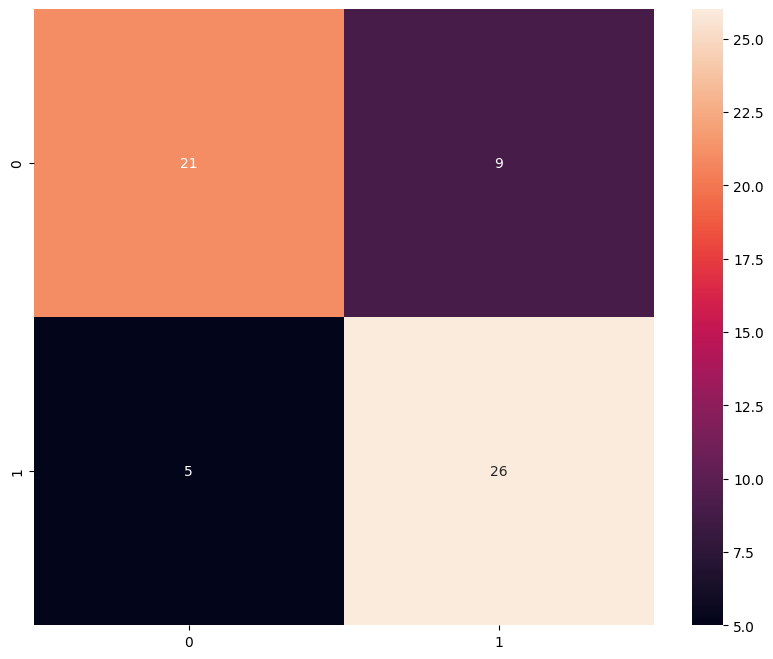

In [57]:
plt.figure(figsize=(10,8))
sns.color_palette('flare', as_cmap=True)
sns.heatmap(matrix, annot=True)

In [58]:
results_knn = classification_report(y_test, y_pred)

In [59]:
print(results_knn)

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        30
           1       0.74      0.84      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [79]:
param_grid = {
    'n_neighbors': [4, 5, 6],  # Number of neighbors to consider
    'weights': ['uniform'],  # Weight function used in prediction
    'p': [2, 3, 4],  # Power parameter for the Minkowski distance metric
    'n_jobs': [-1],  # Number of parallel jobs to run for neighbors search (-1 means using all available processors)
    'leaf_size': [10, 20, 25, 30],  # Leaf size passed to BallTree or KDTree
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}

In [80]:
knn_cv = KNeighborsClassifier()

In [81]:
grid_search = GridSearchCV(knn_cv, param_grid, cv=5)

In [82]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 25, 30], 'n_jobs': [-1],
                         'n_neighbors': [4, 5, 6], 'p': [2, 3, 4],
                         'weights': ['uniform']})

In [83]:
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [84]:
best_knn = grid_search.best_estimator_

In [85]:
y_pred = best_knn.predict(X_test)

In [86]:
results_knn_cv = classification_report(y_test, y_pred)

In [87]:
print(results_knn)
print(results_knn_cv)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        30
           1       0.74      0.84      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        30
           1       0.74      0.84      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [92]:
test_input = [[40, 1, 1, 140, 200, 0, 190, 1, 0.7, 1, 0, 1]]

In [96]:
scaler.feature_names_ = None

In [97]:
test_input_scaled = scaler.transform(test_input)

/home/dude/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [98]:
test_input_scaled

array([[-1.58444641,  0.68100522,  0.03203122,  0.47839125, -0.89407462,
        -1.00583187,  1.76466298,  1.43548113, -0.29297483, -0.64911323,
        -0.71442887, -2.14887271]])

In [99]:
rfc.predict(test_input_scaled)

array([1])

In [100]:
from joblib import dump

In [101]:
dump(scaler, 'scaler_model.joblib')
dump(rfc, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [102]:
dump(scaler, 'scaler_model.joblib')

['scaler_model.joblib']